# Getting started with pandas

"pandas" is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

The convention is to import pandas and set "pd" as its package alias.

# Series

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

A Series is a one-dimensional array of data (<b>values</b>) and an associated array of data labels (<b>index</b>).

Let us create a Series of 4 numbers. The default labels will be 0, 1, 2, 3

In [3]:
s = pd.Series([4, 7, -5, 3])
s

0    4
1    7
2   -5
3    3
dtype: int64

We can create a Series by passing a Dictionary

In [4]:
s = pd.Series({0: 4, 1:7, 3:3, 2:-5})
s

0    4
1    7
2   -5
3    3
dtype: int64

It is important to note that the labels are automatically sorted unless we redefine the index:

In [5]:
s.index = [0, 2, 3, 1]
s

0    4
2    7
3   -5
1    3
dtype: int64

Let's undo this change

In [6]:
s.index = range(4)
s

0    4
1    7
2   -5
3    3
dtype: int64

We can give names to the Series and to the index.

In [7]:
s.name = 'example class'

In [8]:
s.index.name = 'ID'
s

ID
0    4
1    7
2   -5
3    3
Name: example class, dtype: int64

The attribute <b>values</b> returns the values

In [9]:
s.values

array([ 4,  7, -5,  3], dtype=int64)

The attribute <b>index</b> returns the index object. The index could be text, dates, etc

In [10]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64', name=u'ID')

When we create a Series, we can pass an index.

In [11]:
s2 = pd.Series([4, 7, -5, 3], index = ['d', 'b', 'a', 'c'])
s2

d    4
b    7
a   -5
c    3
dtype: int64

Index values are usually unique, but it is possible to have duplicates -- it will be slower. 

The method <b>describe</b> reports summary statistics of the Series values.

In [12]:
s.describe()

count    4.000000
mean     2.250000
std      5.123475
min     -5.000000
25%      1.000000
50%      3.500000
75%      4.750000
max      7.000000
Name: example class, dtype: float64

Aggregate functions are the same as ndarrays: sum, mean, min, max, etc.

In [13]:
s.median()
s.mean()
s.min()

3.5

2.25

-5

We can access a Series elements from the index or from the values

### Access a Series by index

We can use the index as  the key of a dictionary, with a big difference. In Dictionaries, we can access elements using one key; in Series, we can access the values using slices and boolean indexing

If we use one index, we get one value back.

In [15]:
s[2]

-5

If we use slicing, we get a (smaller) Series back. We can use on Series the same slicing techniques seen for ndarrays, including boolean indexing. 

In [16]:
s

ID
0    4
1    7
2   -5
3    3
Name: example class, dtype: int64

In [17]:
s[:3]

ID
0    4
1    7
2   -5
Name: example class, dtype: int64

In [18]:
s[ [True, False, False, True] ]

ID
0    4
3    3
Name: example class, dtype: int64

We can also use another form of boolean mask: a Series of booleans

In [19]:
maskSeries = pd.Series({0: True, 1: False, 2:True, 3:False, -50: True})
maskSeries

-50     True
 0      True
 1     False
 2      True
 3     False
dtype: bool

In [22]:
s

ID
0    4
1    7
2   -5
3    3
Name: example class, dtype: int64

In [21]:
s[maskSeries]

ID
0    4
2   -5
Name: example class, dtype: int64

Note that the maskSeries does not need to be of the same length as the Series. Index values that are not present in the Series (like 50 in the example above) are ignored.

The operator <b>in</b> checks whether a certain index exists.

In [26]:
4 in s

False

In [24]:
s

ID
0    4
1    7
2   -5
3    3
Name: example class, dtype: int64

In [25]:
2 in s

True

### Access a Series by values

Comparison operators return a Series of bool

In [27]:
s

ID
0    4
1    7
2   -5
3    3
Name: example class, dtype: int64

In [28]:
s < 3.5

ID
0    False
1    False
2     True
3     True
Name: example class, dtype: bool

Earlier we saw that we can use a Series of bool to access a Series. So, to select the elements of a Series whose values are smaller than 3.5, we can do this:

In [29]:
s[s < 3.5]

ID
2   -5
3    3
Name: example class, dtype: int64

### Operations between a scalar and a Series

Operations between a Series and a scalar are performed element-wise on the values.

In [30]:
s

ID
0    4
1    7
2   -5
3    3
Name: example class, dtype: int64

In [31]:
s+2

ID
0    6
1    9
2   -3
3    5
Name: example class, dtype: int64

### Operations between two Series

Operations (+, -, /, \*) between Series are performed element-wise on those index values that are present in both Series. Indices values present only on one Series will ba associated to a value of NaN.

 Let us now creates a Series with a dictionary of state population (in 1000's)

In [32]:
popData = {'Ohio': 11571, 'Texas': 26448, 'Oregon': 3930, 'Utah': 2901}

In [33]:
pop = pd.Series(popData)
pop

Ohio      11571
Oregon     3930
Texas     26448
Utah       2901
dtype: int64

Let us create another Series with total gdp (in billions of $). 

In [34]:
gdpData = {'Ohio': 599, 'Texas': 1639, 'Oregon': 228, 'California' : 2449}

In [36]:
gdp = pd.Series(gdpData)
gdp

California    2449
Ohio           599
Oregon         228
Texas         1639
dtype: int64

<b>In class example</b>: compute the gdp per capita (in $/person)

In [39]:
gdp_per_capita = gdp / pop * 1000000
gdp_per_capita

California             NaN
Ohio          51767.349408
Oregon        58015.267176
Texas         61970.659407
Utah                   NaN
dtype: float64

So, operations between series will end up with a final set of keys which is the union of the keys

### More Series methods

<b>head()</b> and <b>tail()</b> retrieves only the first and last elements, respectively.

<b>isnull()</b> finds which elements are null. 

In [40]:
gdp_per_capita.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
Utah           True
dtype: bool

<b>rank()</b> ranks each entry based on the value.

In [41]:
gdp_per_capita.rank()

California    NaN
Ohio          1.0
Oregon        2.0
Texas         3.0
Utah          NaN
dtype: float64

<b>idxmax()</b> and <b>idxmin()</b> find the index corresponding to the maximum and minimum value, respectively.

In [42]:
gdp_per_capita.idxmax()

'Texas'

<b>sort_values()</b> sorts the Series by values

In [43]:
gdp_per_capita.sort_values()

Ohio          51767.349408
Oregon        58015.267176
Texas         61970.659407
California             NaN
Utah                   NaN
dtype: float64

<b>sort_index()</b> sorts the Series by index

In [44]:
gdp_per_capita.sort_index()

California             NaN
Ohio          51767.349408
Oregon        58015.267176
Texas         61970.659407
Utah                   NaN
dtype: float64

<b>iloc[]</b> retrieves the entries based on position (like a list)

In [45]:
gdp_per_capita

California             NaN
Ohio          51767.349408
Oregon        58015.267176
Texas         61970.659407
Utah                   NaN
dtype: float64

In [46]:
gdp_per_capita.iloc[2]

58015.267175572517

<b>nlargest() and nsmallest</b> retrieves the largest or smallest elements

In [47]:
gdp_per_capita.nlargest(2)

Texas     61970.659407
Oregon    58015.267176
dtype: float64

## Finance data example

The following code creates a Series object nf with the Netflix stock prices. Don't worry about undestanding this code.

In [2]:
import pandas as pd
import pandas_datareader.data as web # if this line gives you an error, install pandas_datareader
import datetime    

start = datetime.datetime(2010, 7, 1)
end = datetime.datetime(2017, 1, 26)
df = web.DataReader("NFLX", 'google', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
df['dates'] = dates

# Create a Series called nf
nf = df.Close

Populating the interactive namespace from numpy and matplotlib


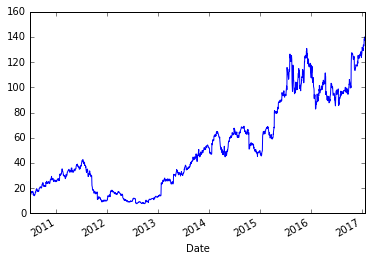

In [3]:
%pylab inline
nf.plot()

<b>Question 1</b><br/>What day had the largest stock price? What day had the smallest stock price?

In [4]:
nf.head()

Date
2010-07-01    15.67
2010-07-02    15.30
2010-07-06    15.32
2010-07-07    16.93
2010-07-08    16.71
Name: Close, dtype: float64

In [5]:
nf.tail()

Date
2017-01-20    138.60
2017-01-23    137.39
2017-01-24    140.11
2017-01-25    139.52
2017-01-26    138.96
Name: Close, dtype: float64

In [6]:
nf.idxmax()

Timestamp('2017-01-24 00:00:00')

In [7]:
print 'On ' + str(nf.idxmax()) + ', NFLX was ' + str(nf[nf.idxmax()])

On 2017-01-24 00:00:00, NFLX was 140.11


<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [8]:
nf.nlargest(10)

Date
2017-01-24    140.11
2017-01-25    139.52
2017-01-26    138.96
2017-01-20    138.60
2017-01-19    138.41
2017-01-23    137.39
2017-01-13    133.70
2017-01-18    133.26
2017-01-17    132.89
2017-01-05    131.81
Name: Close, dtype: float64

<b>Question 3</b><br/>Suppose we invest \$100. How much profit would we make if we bought $100 at the beginning and sold everything on the last day? Try not to type in any date

In [9]:
(nf.iloc[-1] - nf.iloc[0]) / nf.iloc[0] * 100

786.79004467134655

In [10]:
stocks = 100 / nf.iloc[0]
SellFor = stocks * nf.iloc[-1]
SellFor - 100

786.79004467134655

In [11]:
nf.index.min() # to retrieve the earliest date
nf[nf.index.min()] # to find the price on the earliest date

15.67

<b>Question 4</b><br/>What would have been the <b>best</b> timing to "go long"? In other words, what days x and y would have maximized our profit assuming that we bought in x and sold in y? How much profit (%) would we have made?

In [12]:
nf.idxmax()

Timestamp('2017-01-24 00:00:00')

In [13]:
nf[nf.idxmax()]

140.11000000000001

In [14]:
nf.idxmin()

Timestamp('2012-09-25 00:00:00')

In [15]:
nf[nf.idxmin()]

7.6900000000000004

In [16]:
# this solution is only correct if the day when the price is minimum is before
# the day when the price is maximum. See next problem.
(nf[nf.idxmax()] - nf[nf.idxmin()]) / nf[nf.idxmin()] 

17.219765929778934

In [17]:
nf.head()

Date
2010-07-01    15.67
2010-07-02    15.30
2010-07-06    15.32
2010-07-07    16.93
2010-07-08    16.71
Name: Close, dtype: float64

In [18]:
nf[0]

15.67

Why using iloc vs []?

In [19]:
a = pd.Series([32,90.0,87,0.98], index=[1,3,2,98])

In [20]:
a

1     32.00
3     90.00
2     87.00
98     0.98
dtype: float64

In [21]:
a.iloc[3] # when the index is integer, we must use iloc to access through the 
# visualization index

0.97999999999999998

nlargest(1) vs idxmax? nlargest(1) returns a Series, idxmax one value

In [22]:
nf.nlargest(1)

Date
2017-01-24    140.11
Name: Close, dtype: float64

In [23]:
nf.idxmax()

Timestamp('2017-01-24 00:00:00')

<b>Question 5</b><br/>What would have been the <b>worst</b> timing to "go long"? In other words, what days x and y would have minimized our profit assuming that we bought in x and sold in y? How much money would have we lost? Answer this question without using loops. <i>Hint</i>: the method cummin finds the minimum so far.

In [24]:
# for each day, the minimum price reached in the future
nf.head(12)

Date
2010-07-01    15.67
2010-07-02    15.30
2010-07-06    15.32
2010-07-07    16.93
2010-07-08    16.71
2010-07-09    16.79
2010-07-12    17.05
2010-07-13    17.27
2010-07-14    17.57
2010-07-15    17.30
2010-07-16    16.91
2010-07-19    16.99
Name: Close, dtype: float64

In [25]:
nf.tail(5)

Date
2017-01-20    138.60
2017-01-23    137.39
2017-01-24    140.11
2017-01-25    139.52
2017-01-26    138.96
Name: Close, dtype: float64

1) sort from end to start
2) compute the minimum so far for each date (starting from the end)

In [26]:
minToFollow = nf.sort_index(ascending=False).cummin()

For every day, compute the difference between the price (original Series) and the "minimum-to-follow" = loss / stock

In [27]:
x = ((nf - minToFollow) / nf).idxmax()

In [28]:
nf.index > x

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [29]:
y = nf[nf.index > x].idxmin()

In [30]:
(nf[x] - nf[y])/nf[x]

0.81982193064667297

Summary

In [31]:
x = ((nf - nf.sort_index(ascending=False).cummin()) / nf).idxmax()
y = nf[nf.index > x].idxmin()
(nf[x] - nf[y])/nf[x]

0.81982193064667297

<b>Question 6</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the profit (in %) made for every day x. <i>Hint</i>: explore the method <i>shift</i>

In [32]:
temp = nf.shift(-5)

In [33]:
nf.head(6)

Date
2010-07-01    15.67
2010-07-02    15.30
2010-07-06    15.32
2010-07-07    16.93
2010-07-08    16.71
2010-07-09    16.79
Name: Close, dtype: float64

In [34]:
nf

Date
2010-07-01     15.67
2010-07-02     15.30
2010-07-06     15.32
2010-07-07     16.93
2010-07-08     16.71
2010-07-09     16.79
2010-07-12     17.05
2010-07-13     17.27
2010-07-14     17.57
2010-07-15     17.30
2010-07-16     16.91
2010-07-19     16.99
2010-07-20     17.20
2010-07-21     17.09
2010-07-22     14.79
2010-07-23     15.39
2010-07-26     14.68
2010-07-27     14.87
2010-07-28     14.33
2010-07-29     14.00
2010-07-30     14.65
2010-08-02     14.55
2010-08-03     14.92
2010-08-04     15.45
2010-08-05     15.79
2010-08-06     16.90
2010-08-09     16.70
2010-08-10     17.86
2010-08-11     18.07
2010-08-12     19.01
               ...  
2016-12-13    123.78
2016-12-14    123.44
2016-12-15    125.00
2016-12-16    124.22
2016-12-19    125.45
2016-12-20    125.12
2016-12-21    126.50
2016-12-22    125.58
2016-12-23    125.59
2016-12-27    128.35
2016-12-28    125.89
2016-12-29    125.33
2016-12-30    123.80
2017-01-03    127.49
2017-01-04    129.41
2017-01-05    131.81
2017-01-

In [35]:
(nf.shift(-5) - nf) / nf 

Date
2010-07-01    0.071474
2010-07-02    0.114379
2010-07-06    0.127285
2010-07-07    0.037803
2010-07-08    0.035308
2010-07-09    0.007147
2010-07-12   -0.003519
2010-07-13   -0.004053
2010-07-14   -0.027319
2010-07-15   -0.145087
2010-07-16   -0.089888
2010-07-19   -0.135962
2010-07-20   -0.135465
2010-07-21   -0.161498
2010-07-22   -0.053414
2010-07-23   -0.048083
2010-07-26   -0.008856
2010-07-27    0.003362
2010-07-28    0.078158
2010-07-29    0.127857
2010-07-30    0.153584
2010-08-02    0.147766
2010-08-03    0.197051
2010-08-04    0.169579
2010-08-05    0.203927
2010-08-06    0.117751
2010-08-09    0.173653
2010-08-10    0.063830
2010-08-11   -0.006087
2010-08-12   -0.036297
                ...   
2016-12-13    0.010826
2016-12-14    0.024789
2016-12-15    0.004640
2016-12-16    0.011029
2016-12-19    0.023117
2016-12-20    0.006154
2016-12-21   -0.009249
2016-12-22   -0.014174
2016-12-23    0.015129
2016-12-27    0.008259
2016-12-28    0.047025
2016-12-29    0.045799
2016-1